In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 1 Dimensions vs Metrics

Have a look at all fields in all reports that we deliver to clients.

There are two kind of fields:
* dimensions (country, banner_id, campaign_name ..)
* metrics: (clicks, spends, impressions …)

We need an estimation for a question: what part of the fields are metrics? 

It is not always easy to say exactly if this field metric is neither dimension. Ok to have answe liker: from 25% to 35%

round answer to integer


In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv('https://redash.tools.improvado.io/api/queries/2923/results.csv?api_key=ybPMWxe8hQRtwswE0hwvssRGqtl7fLSfX8XgBgiV')

In [5]:
df

,data_source_title,report_type_title,field_title,sql_field_name,api_field_name
0,ACME,Transactions,Net Transaction Amount,net_transaction_amount,NetTransactionAmount
1,ACME,Transactions,Order Amount,order_amount,OrderAmount
2,ACME,Transactions,Order Balance,order_balance,OrderBalance
3,ACME,Transactions,Payment Amount,payment_amount,PaymentAmount
4,ACME,Transactions,Quantity,quantity,Quantity
...,...,...,...,...,...
31381,Zignal Labs,Key Metrics,News Blogs,news_blogs,:calc.news_blogs
31382,Zignal Labs,Key Metrics,Total Mentions,total_mentions,mentions.count
31383,Zignal Labs,Key Metrics,Mqs,mqs,mqs.media_quality_score
31384,Zignal Labs,Newsroom Stories,Influence,influence,influence


In [6]:
df['data_source_title'].unique()

array(['ACME', 'ActiveCampaign', 'Act on', 'Adform', 'AdFox', 'Adition',
       'Adjust API', 'Adobe Analytics', 'Adobe Analytics Data Feed',
       'Adriver', 'AdRoll', 'Adthena', 'Advangelists', 'Advantage',
       'Amazon Advertising', 'Amazon Advertising DSP',
       'Amazon Attribution', 'Amazon MWS', 'Amazon Selling Partner',
       'Amazon Selling Partner for Sellers', 'Apple Search', 'AppsFlyer',
       'AppsFlyer Master Api', 'Appsflyer SKADnetwork', 'Atlassian Jira',
       'Authoritas', 'AutoPilot', 'AWIN', 'Basis Platform API', 'Beeswax',
       'Beeswax Entity', 'Belboon', 'Bing Ads (Microsoft Advertising)',
       'Bing Webmaster Tools', 'Botify', 'Box', 'Branch', 'Brandwatch',
       'Business.Idealo', 'Buzzoola', 'CallRail', 'CallTrackingMetrics',
       'Campaign Monitor', 'Capterra', 'Centro DSP', 'Convertr', 'Criteo',
       'Criteo Retail Media', 'Deputy', 'Dialogtech', 'Domain',
       'Dot Digital', 'eBay', 'Eventbrite', 'Everflow Affiliate API',
       'Example',

In [7]:
df[df['data_source_title'] == 'Google Ads']

,data_source_title,report_type_title,field_title,sql_field_name,api_field_name
11899,Google Ads,Adgroups,Interactions,interactions,metrics.interactions
11900,Google Ads,Adgroups,All Conversions,all_conversions,metrics.all_conversions
11901,Google Ads,Adgroups,All Conversions Value,all_conversions_value,metrics.all_conversions_value
11902,Google Ads,Adgroups,Impressions,impressions,metrics.impressions
11903,Google Ads,Adgroups,Conversions Value,conversions_value,metrics.conversions_value
...,...,...,...,...,...
13570,Google Ads,Geo Adgroups City,Ad group,ad_group_name,ad_group.name
13571,Google Ads,Geo Adgroups City,Ad group ID,ad_group_id,ad_group.id
13572,Google Ads,Geo Adgroups City,Campaign,campaign_name,campaign.name
13573,Google Ads,Geo Adgroups City,Campaign ID,campaign_id,campaign.id


In [8]:
conversion_actions = [
    'cost', 'spent', 'impression', 'impressions', 
    'view', 'views', 'reach', 
    'conversion', 'conversions', 'engage', 'engagement', 
    'value', 'rate', 'share', 'revenue', 
    'income', 'score', 'percent', 'like', 'likes',
    'comment', 'comments', 'sale', 'sales', 
    'amount', 'install', 'installs',
    'visit', 'visits', 'count', 'duration', 'bounce_rate', 
    'cost', 'sku', 'transaction', 'transactions', 
    'tweet', 'tweets', 'user', 'users', 
    'session', 'sessions', '_num', 
    'order', 'orders', 'purchase', 'purchases', 
    'item', 'items', 'click', 'click', 'event', 'depth', 
    'frequency', 'result', 'results', '_pres']

In [9]:
d = {}
for col in df:
    c = 0
    d[col] = [len(df[col])]
    
    for item in df[col]:
        # if item in conversion_actions:
        if [s for s in conversion_actions if s in item]:
            c += 1
    d[col].append(c)

In [10]:
d

{'data_source_title': [31386, 283],
 'report_type_title': [31386, 2031],
 'field_title': [31386, 2224],
 'sql_field_name': [31386, 13557],
 'api_field_name': [31386, 9890]}

In [11]:
for key, value in d.items():
    print(f'{key}: {round((value[1]/value[0]) * 100, 2)}')

data_source_title: 0.9
report_type_title: 6.47
field_title: 7.09
sql_field_name: 43.19
api_field_name: 31.51


In [12]:
print(f'Metric percentage for SQL & API fields: {round((13385 + 9806) / (30718 * 2) * 100)}%')

Metric percentage for SQL & API fields: 38%


#### 2 Sales Manager conversions

Here is `csv` file with sales stats. Calculate conversion rate from touch to deal. What is the best? 

Be careful. If you don’t feel the data you will make a mistake. You need to understand how data could be matched with real sales processes.

In [13]:
df = pd.read_csv('https://drive.google.com/uc?id=1JL_qmha_6p7ojtMdT4x95HKPhXaMs_m0')

In [14]:
ft = df[df['event_name'] == 'first_touch']

In [15]:
ft.head()

,client_account_id,date,event_name,manager_id,manager_nickname
0,0,2022-05-09,first_touch,1.0,Justin Beiber
1,1,2022-03-21,first_touch,3.0,Joe Biden
2,2,2022-04-18,first_touch,2.0,Kylie Jenner
3,3,2022-02-07,first_touch,2.0,Kylie Jenner
4,4,2022-04-08,first_touch,1.0,Justin Beiber


In [16]:
ft['manager_id'].unique()

array([1., 3., 2.])

In [17]:
ft['manager_nickname'].unique()

array(['Justin Beiber', 'Joe Biden', 'Kylie Jenner'], dtype=object)

In [18]:
d =  df[df['event_name'] == 'deal']

In [19]:
d.head()

,client_account_id,date,event_name,manager_id,manager_nickname
41,40,2022-02-24,deal,3.0,Joe Biden
65,63,2022-03-14,deal,2.0,Kylie Jenner
89,86,2022-05-24,deal,1.0,Justin Beiber
91,87,2022-05-23,deal,2.0,Kylie Jenner
132,127,2021-08-30,deal,3.0,Joe Biden


In [20]:
d['manager_id'].unique()

array([3., 2., 1.])

In [21]:
d['manager_nickname'].unique()

array(['Joe Biden', 'Kylie Jenner', 'Justin Beiber'], dtype=object)

In [22]:
managers = d['manager_nickname'].unique()

In [23]:
x = {}
for manager in managers:
    x[manager] = [ft[ft['manager_nickname'] == manager]['event_name'].count()]
    x[manager].append(d[d['manager_nickname'] == manager]['event_name'].count())

In [24]:
x

{'Joe Biden': [1158, 91],
 'Kylie Jenner': [939, 68],
 'Justin Beiber': [890, 37]}

In [25]:
for key, value in x.items():
    print(f'{key}: {round(value[1]/value[0] * 100, 2)}')

Joe Biden: 7.86
Kylie Jenner: 7.24
Justin Beiber: 4.16


**Фидбек от компании**: в рассчете конверсии сотрудников была ошибка - не учтен был момент, что $3$ менеджера начали работать в разное время - из-за этого конверсия сильно отличается. И соответственно сравнивать нужно было эффективность только за тот период, в который попадали все.

Посчитаем все заново.

In [26]:
j = df[df['manager_nickname'] == 'Justin Beiber']

In [27]:
k = df[df['manager_nickname'] == 'Kylie Jenner']

In [28]:
b = df[df['manager_nickname'] == 'Joe Biden']

In [29]:
print(f"Justin Beiber: {j['date'].min(), j['date'].max()}\n\
Kylie Jenner: {k['date'].min(), k['date'].max()}\n\
Joe Biden: {b['date'].min(), b['date'].max()}")

Justin Beiber: ('2022-01-10', '2022-06-03')
Kylie Jenner: ('2021-09-12', '2022-06-03')
Joe Biden: ('2021-05-16', '2022-06-03')


In [30]:
t = df.groupby(['date', 
                'manager_nickname', 
                'event_name'])['event_name'].count().to_frame().rename(
    columns={'event_name': 'event_count'}).reset_index()

In [31]:
t['date'] = pd.to_datetime(t['date'], format='%Y-%m-%d')

In [32]:
t

,date,manager_nickname,event_name,event_count
0,2021-05-16,Joe Biden,first_touch,4
1,2021-05-17,Joe Biden,first_touch,1
2,2021-05-18,Joe Biden,first_touch,1
3,2021-05-19,Joe Biden,first_touch,1
4,2021-05-20,Joe Biden,first_touch,2
...,...,...,...,...
928,2022-06-02,Justin Beiber,first_touch,6
929,2022-06-02,Kylie Jenner,first_touch,3
930,2022-06-03,Joe Biden,first_touch,3
931,2022-06-03,Justin Beiber,first_touch,2


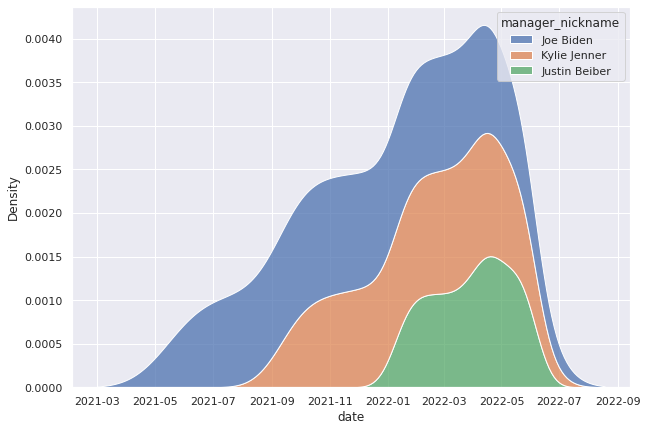

In [33]:
sns.set(rc={'figure.figsize':(10,7)})

sns.kdeplot(data=t, 
            x='date', 
            hue='manager_nickname', 
            multiple='stack');

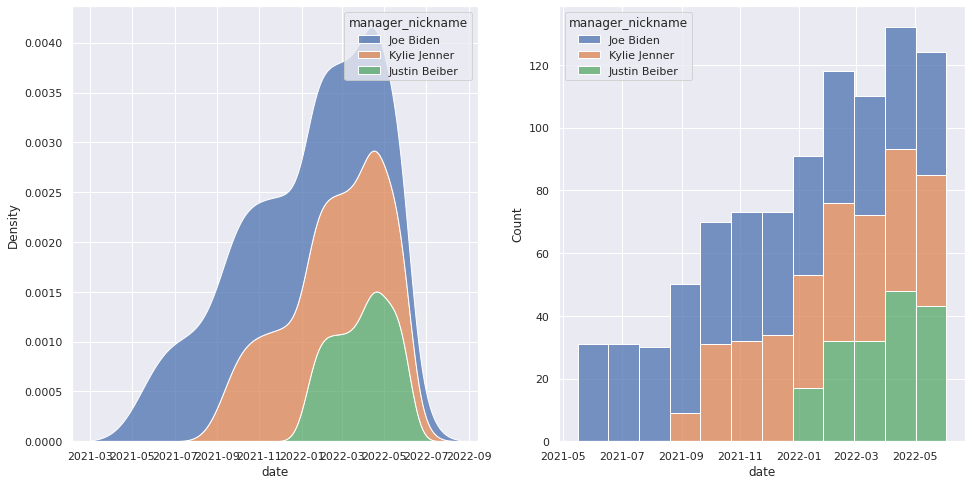

In [90]:
fig, (ax0, ax1) = plt.subplots(nrows=1, # Количество строк в фигуре
                               ncols=2, # Количество колонок в фигуре
                               sharey=False, # Единые метки оси 'y' для обоих графиков
                               figsize=(16, 8) # Размер фигуры
                              );
sns.kdeplot(data=t, 
            x='date', 
            hue='manager_nickname', 
            multiple='stack',
            ax=ax0),

sns.histplot(data=t, 
            x='date', 
            hue='manager_nickname', 
            multiple='stack', 
            ax=ax1);

Для вычисления конверсии возьмем общий для всех менеджером период. Будем считать его по датам `Justin Beiber`.

In [34]:
f = t[(t['date']>=j['date'].min()) & (t['date']<=j['date'].max())]

In [35]:
f = f.groupby(['manager_nickname', 'event_name'])['event_name'].count().to_frame().rename(
    columns={'event_name': 'event_count'}).reset_index()

In [36]:
f

,manager_nickname,event_name,event_count
0,Joe Biden,deal,35
1,Joe Biden,first_touch,141
2,Justin Beiber,deal,28
3,Justin Beiber,first_touch,144
4,Kylie Jenner,deal,49
5,Kylie Jenner,first_touch,141


In [37]:
print(f"Managers' CR:\n\
Justin Beiber: {round(f['event_count'][2]/f['event_count'][3] * 100, 2)}%\n\
Kylie Jenner: {round(f['event_count'][4]/f['event_count'][5] * 100, 2)}%\n\
Joe Biden: {round(f['event_count'][0]/f['event_count'][1] * 100, 2)}%")

Managers' CR:
Justin Beiber: 19.44%
Kylie Jenner: 34.75%
Joe Biden: 24.82%


#### Marketing Attribution, ( identity graph )

How many identities we have in example 1 and example 2.

In [38]:
table = '''1111|2222|3333
null|2222|3334
1111|null|3335
1112|2223|null
null|null|3334'''

In [39]:
table_1 = pd.DataFrame([row.replace(' ', '').split('|') for row in table.split('\n')])

In [40]:
table_1.columns = ['id_1', 'id_2', 'id_3']

In [41]:
table_1.T

,0,1,2,3,4
id_1,1111,null,1111,1112,null
id_2,2222,2222,null,2223,null
id_3,3333,3334,3335,null,3334


In [42]:
table = '''
444|2222|3335
445|null|3334
null|2223|3334
||
||
||
'''

In [43]:
table_2 = pd.DataFrame([row.replace(' ', '').split('|') for row in table.split('\n')])

In [44]:
table_2.columns = ['id_4', 'id_2', 'id_3']

In [45]:
table_1.T

,0,1,2,3,4
id_1,1111,null,1111,1112,null
id_2,2222,2222,null,2223,null
id_3,3333,3334,3335,null,3334


In [46]:
table_2.T

,0,1,2,3,4,5,6,7
id_4,,444,445,null,,,,
id_2,None,2222,null,2223,,,,None
id_3,None,3335,3334,3334,,,,None
